In [1]:
import sys
sys.path.append('../')

from src.dataset import CustomImageDataset, CustomImageDataset2
from src.neural_network import Generator, Discriminator
from src.project import Project
from src.losses import *
from src.callbacks import *

from torchvision import transforms as T

import torch.optim as optim

In [2]:
real_path = r'C:\Users\giudi\Downloads\training_dataset'

image_transforms = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = CustomImageDataset2(root_dir=real_path, transform=image_transforms, name1='trainA', name2='trainB')

In [2]:
real_path = r'C:\Users\giudi\Desktop\BackUP\Programming\Python\Pixel-art\imgs'
pixe_path = r'C:\Users\giudi\Desktop\BackUP\Programming\Python\Pixel-art\imgs\pixel-art'

image_transforms = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset1 = CustomImageDataset(root_dir=real_path, folder_names=['people'], transform=image_transforms, name1='real', name2='pixel-art')
dataset2 = CustomImageDataset(root_dir=real_path, folder_names=['animals'], transform=image_transforms, name1='real', name2='pixel-art')
dataset3 = CustomImageDataset(root_dir=real_path, folder_names=['cats'], transform=image_transforms, name1='real', name2='pixel-art')
dataset4 = CustomImageDataset(root_dir=real_path, folder_names=['dogs'], transform=image_transforms, name1='real', name2='pixel-art')
dataset5 = CustomImageDataset(root_dir=real_path, folder_names=['food'], transform=image_transforms, name1='real', name2='pixel-art')
dataset = dataset1 + dataset2 + dataset3 + dataset4 + dataset5

In [3]:
generator_pixel = Generator(img_channels=3)
discriminator_pixel = Discriminator()

generator_people = Generator(img_channels=3)
discriminator_people = Discriminator()

In [4]:
project = Project()
project.compile(discriminator_people=discriminator_people, generator_people=generator_people, discriminator_pixel=discriminator_pixel, generator_pixel=generator_pixel,)

Using device: cuda


In [5]:
loss_adversarial = MeanSquaredEerror()
loss_consistency = MeanAbsoluteError()

In [6]:
optimizer_discriminator = optim.Adam(list(discriminator_pixel.parameters()) + list(discriminator_people.parameters()), betas=(0.5, 0.999))
optimizer_generator = optim.Adam(list(generator_pixel.parameters()) + list(generator_people.parameters()), betas=(0.5, 0.999))

In [8]:
lg = Logger()
gp = GeneratorPlotteronNotebook()
ls = LearningRateScheduler(initial_epoch=100)
mc = ModelCheckpoint(save_path = r'C:\Users\giudi\Desktop\BackUP\Programming\Python\Pixel-art\models', model_name='teste')

callbacks = [lg, gp, ls, mc]

Running on 1 GPUs. Training on 900 samples
Epoch 1/1 >>> Batch 300/300 -- Loss generator: 6.63429,  Loss discriminator: 0.44224,  Elapsed Time: 415.4


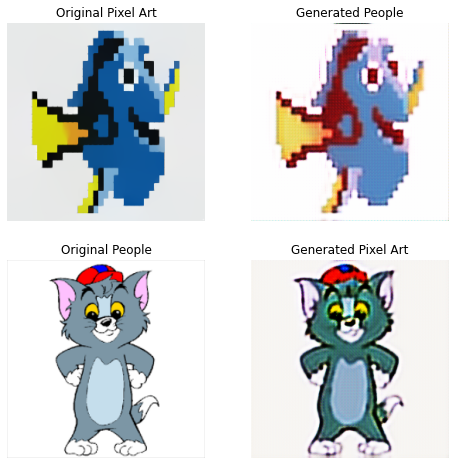

Finished training. Total elapsed time: 415.4 seconds


In [9]:
history = project.fit(train_dataset=dataset, 
                      optimizer_discriminators=optimizer_discriminator,
                      optimizer_generators=optimizer_generator,
                      epochs=1, 
                      batch_size=3,
                      shuffle=True,
                      learning_rate=0.0002,
                      loss_function_adversarial=loss_adversarial,
                      loss_function_consistency=loss_consistency, 
                      callbacks=callbacks,
                      lambda_cycle=10,
                      lambda_identity=5,)